# Summary Information : v2.0 and v2.1 Runs #

This notebook will help guide you through the v2.0 and v2.1 simulations, with a short summary of the various 'families' of simulations available and some details on the individual simulations. 

The v2.0 simulations are primarily a response to the SCOC Phase 1 recommendations ([PSTN-053](https://pstn-053.lsst.io)). One of the biggest changes from previous survey simulations is that the <a href="#baseline">baseline survey</a> footprint has been modified somewhat -- the "Wide Fast Deep" area, which typically obtains on the order of 825 visits per pointing, split across 6 filters, now explicitly encompasses a low-dust-extinction area as well as a Galactic Plane extension. The overall WFD area is similar to previous simulations, and familiar mini-survey areas of the North Ecliptic Plane, the background Galactic Plane, and the South Celestial Pole fill in the remainder of the survey footprint, along with the five Deep Drilling Fields.

These simulations were extended with the v2.1 simulations, which are both continuation of a response to the SCOC Phase 1 recommendations and an extension in response to community feedback originating from the v2.0 simulations. 
There is also an updated <a href="#baseline">v2.1 baseline survey</a> (`baseline_v2.1_10yrs`) which adds a few additional updates over the `baseline_v2.0_10yrs` -- including adding the Virgo cluster into the low-dust WFD region and adding a requirement to acquire good seeing (fwhmEff < 0.8") images in r and i bands each year. There are a large series of DDF simulations in v2.1. These introduce a new DDF scheduling method, which uses pre-scheduled visits to optimize the placement of sequences in the lunar cycle, minimizing gaps while maximizing image depth. This new scheduling method also allows variation of the DDF cadence throughout a season. Most v2.1 simulations use pre-scheduled DDF visits; all v2.0 simulations use the previous DDF scheduling method which simply scheduled visits based on the fraction of visits acquired for the DDF relative to the remainder of the survey.

The primary questions we hope to address through the v2.0 and v2.1 series include:
* what should the <a href="#intranight">intra-night cadence</a> be? (should we take triplets of visits or pairs of visits, or a mixture? should some pairs of visits be spaced more widely apart in time?)
* should <a href="#rolling">rolling cadence</a> be used in the LSST and if so, how best should it be deployed?
* what fraction of the survey time should be spent on the various <a href="#mini-surveys">mini-surveys</a>, in particular the North Ecliptic Spur and the background Galactic Plane? 
 - see the vary_gp and vary_nes families, compared to baseline
* should the time spent in various <a href="#filter">filters</a>, particularly bluer filters, be modified?
* A few <a href="#oddnends">other questions</a> - should we vary the exposure time per visit? Should we add more filters with good seeing visits required?
* what are the benefits or costs of adding various <a href="micro-surveys">micro-surveys</a>?
* how should the <a href="#ddf">DDFs</a> be scheduled? 


### Preparation / download information about the runs ###

This information is handled by the maf.archive module 

In [2]:
%matplotlib inline
import run_infos as ri
import numpy as np
import pandas as pd
import rubin_sim.maf as maf
import IPython

In [3]:
# Download the curated list of v2.0 and v2.1 runs
run_source = 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/runs_v2.1.json'
run_source = 'runs_v2.1.json'
families = maf.get_family_descriptions(run_source)

In [4]:
families.explode('run').head()

,description,version,reference,run,brief,filepath,url
family,,,,,,,
baseline,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,baseline_v2.1_10yrs,"[v2.1 baseline (+Virgo, good seeing), v2.0 bas...","[baseline/baseline_v2.1_10yrs.db, baseline/bas...",[http://epyc.astro.washington.edu/~lynnej/opsi...
baseline,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,baseline_v2.0_10yrs,"[v2.1 baseline (+Virgo, good seeing), v2.0 bas...","[baseline/baseline_v2.1_10yrs.db, baseline/bas...",[http://epyc.astro.washington.edu/~lynnej/opsi...
baseline,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,baseline_retrofoot_v2.0_10yrs,"[v2.1 baseline (+Virgo, good seeing), v2.0 bas...","[baseline/baseline_v2.1_10yrs.db, baseline/bas...",[http://epyc.astro.washington.edu/~lynnej/opsi...
baseline,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,retro_baseline_v2.0_10yrs,"[v2.1 baseline (+Virgo, good seeing), v2.0 bas...","[baseline/baseline_v2.1_10yrs.db, baseline/bas...",[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,noroll_v2.0_10yrs,"[v2.0 baseline with no rolling, Rolling half-s...","[noroll/noroll_v2.0_10yrs.db, rolling/rolling_...",[http://epyc.astro.washington.edu/~lynnej/opsi...


In [5]:
# Download summary stats for quick info
summary_source = 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/summary_2022_04_23.csv'
summary_source = 'summary_2022_04_23.csv'
summaries = maf.get_metric_summaries(summary_source=summary_source)

In [6]:
metrics_source = 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/metric_sets.json'
metrics_source = 'metric_sets.json'
metrics = maf.get_metric_sets(metrics_source)
metrics.head()

metric  \
metric set metric                                                                                                  
radar      fONv MedianNvis fO All visits HealpixSlicer               fONv MedianNvis fO All visits HealpixSlicer   
           Mean WeakLensingNvisits fiveSigmaDepth, visitEx...  Mean WeakLensingNvisits fiveSigmaDepth, visitE...   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2ptFoM ExgalM5_with_cuts i band non-DD year ...   
           SNIa_PrePeak non-DD UserPointsSlicer                             SNIa_PrePeak non-DD UserPointsSlicer   
           TDEsPopMetric__some_color_pu  UserPointsSlicer         TDEsPopMetric__some_color_pu  UserPointsSlicer   

                                                              short_name  \
metric set metric                                                          
radar      fONv MedianNvis fO All visits HealpixSlicer          fONv_med   
           Mean WeakLensingNvisits fiveSigmaDepth, visitEx...         WL   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2pt FoM   
           SNIa_PrePeak non-DD UserPointsSlicer                     SNIa   
           TDEsPopMetric__some_color_pu  UserPointsSlicer            TDE   

                                                              short_names_norm  \
metric set metric                                                                
radar      fONv MedianNvis fO All visits HealpixSlicer                fONv_med   
           Mean WeakLensingNvisits fiveSigmaDepth, visitEx...               WL   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...        3x2pt FoM   
           SNIa_PrePeak non-DD UserPointsSlicer                           SNIa   
           TDEsPopMetric__some_color_pu  UserPointsSlicer                  TDE   

                                                              style  invert  \
metric set metric                                                             
radar      fONv MedianNvis fO All visits HealpixSlicer         None   False   
           Mean WeakLensingNvisits fiveSigmaDepth, visitEx...  None   False   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  None   False   
           SNIa_PrePeak non-DD UserPointsSlicer                None   False   
           TDEsPopMetric__some_color_pu  UserPointsSlicer      None   False   

                                                                 mag  
metric set metric                                                     
radar      fONv MedianNvis fO All visits HealpixSlicer         False  
           Mean WeakLensingNvisits fiveSigmaDepth, visitEx...  False  
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  False  
           SNIa_PrePeak non-DD UserPointsSlicer                False  
           TDEsPopMetric__some_color_pu  UserPointsSlicer      False

In [7]:
# And a function to make life easier 
# Basic 'general' metrics for a family(s)
def describe_family(family):
    result = maf.archive.describe_families(
        families.loc[[family], :],
        summary=summaries,
        table_metric_set=metrics.loc["short"],
        plot_metric_set=metrics.loc["area"],
        baseline_run=families.loc[family, "reference"],
    )
    #return result

<a id='baseline'></a>

## Simulations ##

### Baseline ###

The updated baseline simulations! And some additional simulations that might help in translating from the older sims.

---
**baseline** : The v2 baseline simulations. V2.0 and V2.1 feature a survey footprint with expanded dust-free area and WFD-level visits in the Galactic Bulge and Magellanic Clouds. Coverage of the Northern Ecliptic Spur, South Celestial Pole, and remainder of the Galactic Plane is maintained, at lower levels. Filter balance is modified in different areas of the sky. A 2-region rolling cadence is used in the dust-free WFD sky, to improve cadence. The v2.1 simulation adds coverage in the Virgo cluster and acquisition of good seeing images in r&i bands. The retro simulations are intended to provide a bridge from v1.X to v2.X, introducing modifications to the footprint and scheduler code separately and in stages.  
**version**: --  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
baseline_v2.1_10yrs,"v2.1 baseline (+Virgo, good seeing)",12434.14,16842.94,2081749.0,838.0,54.0,68.0,179.0,181.0,159.0,165.0
baseline_v2.0_10yrs,v2.0 baseline,12893.23,16711.18,2086980.0,839.0,54.0,70.0,178.0,180.0,160.0,166.0
baseline_retrofoot_v2.0_10yrs,v1.x footprint but new code capabilities,17510.18,14959.57,2086534.0,875.0,56.0,79.0,185.0,188.0,166.0,173.0
retro_baseline_v2.0_10yrs,v1.x baseline with rubin_sim (without new code capabilities),14611.26,15095.54,2048566.0,848.0,53.0,74.0,180.0,180.0,161.0,172.0


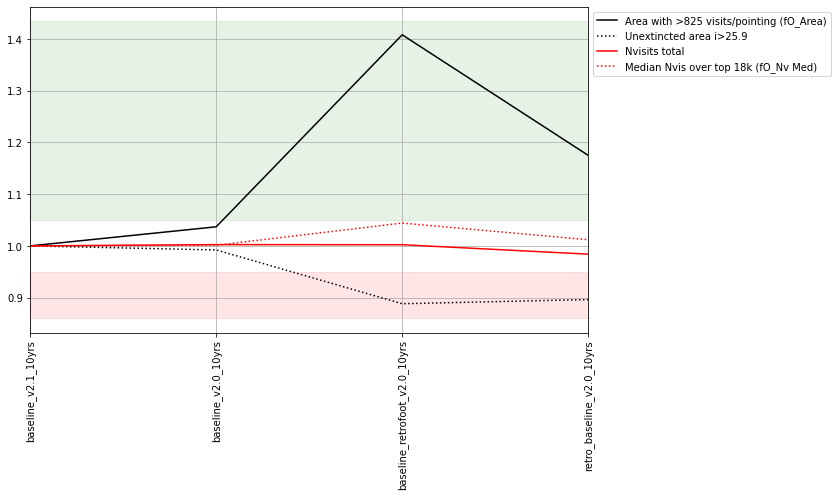

In [8]:
describe_family('baseline')

0.0 180.0 -180.0 180.0


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


{'SkyMap': 1, 'Histogram': 2}

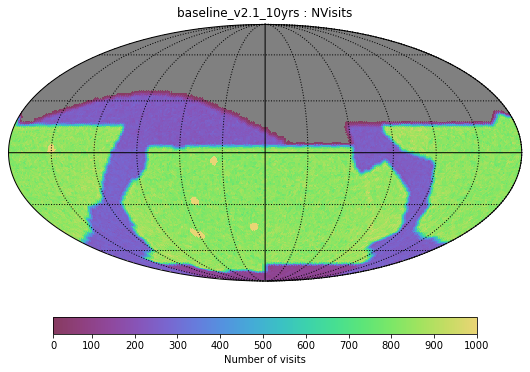

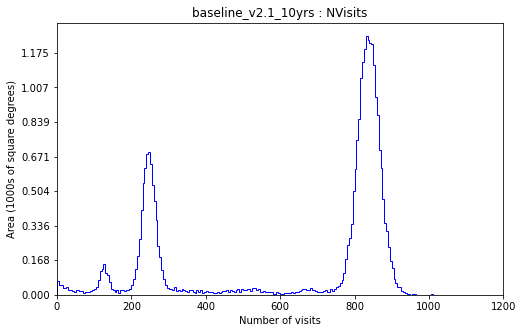

In [9]:
# Since the footprint is modified a bit, let's check it out
nvisits = maf.MetricBundle.load('baseline_v2_1_10yrs_Nvisits_HEAL.npz')
nvisits.setPlotDict({'colorMin': 10, 'colorMax': 1000, 'xlabel': 'Number of visits',
                    'figsize': (8, 5), 'xMin': 0, 'bins': np.arange(0, 1200, 5)})
nvisits.plot()

You can see some differences -- the v2.0/v2.1 footprint requires slightly more survey time to cover an overall larger footprint on the sky, than was covered in v1.7, so the amount of area with much more than 825 visits per pointing drops. The median value of 'Number of visits per position on the sky' is still above 825 over an 18,000 sq deg area, but it's much closer to 825 than it used to be (so the tails of this distribution bring the amount of area with strictly > 825 visits per pointing down, compared to the v1.x footprint).

<a id="intranight"></a>

### Intranight cadence ###

A big question to tackle at this point is the intra-night cadence. This question primarily relates to whether we will observe in pairs per night or triplets of visits in each night, but also includes questions about the mix of filters to choose within each night and the time between visits. 

Observing in pairs allows the LSST to cover more new sky each night, while the pair of visits allows rejection of spurious transients (primarily due to confusion with moving objects). Separating the pair by 33 minutes (vs. 11 to 55 minutes) was shown in the v1.7 series `pair_times` to result in the best overall efficiency in terms of both acquiring pairs and open-shutter time, as well as good solar system object identification. We also found that observing in different filters in these pairs provided much better information for transients and variables than observing in a single filter for both visits of the pair. 

However, there are some classes of transients with variability timescales and classification needs such that another observation in the same filter, acquired several hours after the first visit, is required. This leads to the idea of observing a pointing three times per night, with the third visit in the same filter as the first and separated by a variety of timespans. This is explored in various forms in the `triplets` family here. Taking triplets in each night typically decreases the amount of 'new sky' area explored each night and increases the number of nights until the pointing is revisited. 

We also have a family of experiments where we widen the pair time significantly, to expand the revisit time to several hours. This is the `long gaps no pairs` family. 

---
**triplets** : These simulations add a third visit within each night, with variations on the time interval between the first pair of visits (standard separation of 33 minutes) to the third visit. The third visit is always acquired in the same filter as one of the earlier visits in the pair. The "presto_gap" runs take triplets all the time, at a set interval to the third visit and in the filter pairs described in the brief descriptions. The "presto_half" runs are similar, but only take triplets of visits about half of the time. The "long_gaps" runs vary the interval to the third visit, and generally have longer gaps of 2 to 7 hours. The long_gaps run take triplets at a variety of frequencies, ranging from every night to every few nights; in some simulations the triplets do not start until year 5.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
presto_gap1.5_v2.0_10yrs,"Triples spaced 1.5 hours apart g+r,r+i,i+z initial pairs",2177.97,12137.03,1991926.0,790.0,17.0,76.0,173.0,183.0,154.0,152.0
presto_gap2.0_v2.0_10yrs,"Triples spaced 2.0 hours apart g+r,r+i,i+z initial pairs",3255.62,11658.63,2004698.0,798.0,25.0,75.0,173.0,182.0,154.0,153.0
presto_gap2.5_v2.0_10yrs,"Triples spaced 2.5 hours apart g+r,r+i,i+z initial pairs",2386.95,12485.33,1986054.0,792.0,28.0,74.0,172.0,179.0,152.0,152.0
presto_gap3.0_v2.0_10yrs,"Triples spaced 3.0 hours apart g+r,r+i,i+z initial pairs",2732.74,12722.01,1986782.0,794.0,30.0,73.0,172.0,178.0,153.0,152.0
presto_gap3.5_v2.0_10yrs,"Triples spaced 3.5 hours apart g+r,r+i,i+z initial pairs",3034.05,12541.56,1992713.0,796.0,31.0,73.0,172.0,177.0,153.0,153.0
presto_gap4.0_v2.0_10yrs,"Triples spaced 4.0 hours apart g+r,r+i,i+z initial pairs",3530.07,12735.44,1998152.0,799.0,36.0,72.0,173.0,177.0,153.0,153.0
presto_gap1.5_mix_v2.0_10yrs,"Triples spaced 1.5 hours apart g+i,r+z,i+y initial pairs",1400.78,15687.24,1977886.0,787.0,19.0,71.0,171.0,176.0,159.0,159.0
presto_gap2.0_mix_v2.0_10yrs,"Triples spaced 2.0 hours apart g+i,r+z,i+y initial pairs",2426.40,15796.35,1995049.0,795.0,26.0,71.0,172.0,176.0,158.0,160.0
presto_gap2.5_mix_v2.0_10yrs,"Triples spaced 2.5 hours apart g+i,r+z,i+y initial pairs",1822.11,15860.13,1978530.0,790.0,30.0,70.0,170.0,173.0,156.0,158.0


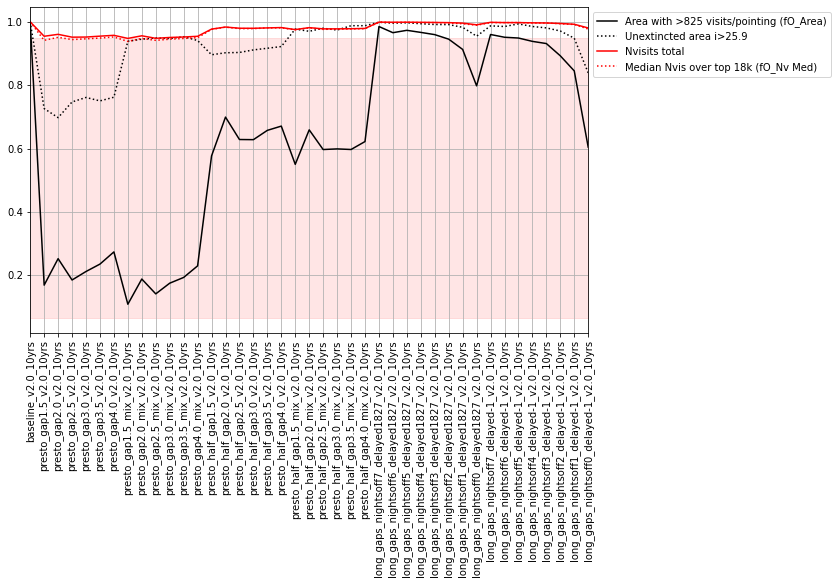

In [10]:
describe_family('triplets')

---
**long gaps no pairs** : The baseline survey strategy takes pairs of visits every few nights, wherethe pair is separated by about 33 minutes. The pairs are taken in mixed filters, for color measurements. These simulations extend the gap between the pair of visits, modifying it to a variable time period of between 2 to 7 hours. The pair of visits are both in the same filter, in any of griz (g+r, r+i, or i+z pairs). In some of the simulations, these long gap visits are obtained throughout the survey, while for other simulations the longer time separations do not start until year 5.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs,Long gaps pairs every 7 nights starting after year 5,12520.58,16675.93,2084679.0,837.0,53.0,70.0,177.0,179.0,160.0,166.0
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs,Long gaps pairs every 6 nights starting after year 5,12443.37,16766.57,2083998.0,837.0,53.0,69.0,177.0,179.0,160.0,166.0
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs,Long gap pairs every 5 nights starting after year 5,12414.83,16655.78,2083679.0,837.0,53.0,70.0,177.0,179.0,160.0,166.0
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs,Long gap pairs every 4 nights starting after year 5,12335.94,16678.44,2082707.0,837.0,53.0,70.0,177.0,179.0,160.0,166.0
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs,Long gap pairs every 3 nights starting after year 5,12362.80,16618.85,2082329.0,837.0,53.0,70.0,177.0,179.0,160.0,165.0
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs,Long gap pairs every 2 nights starting after year 5,12073.24,16607.10,2080554.0,836.0,53.0,70.0,177.0,179.0,160.0,165.0
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs,Long gap pairs every other night starting after year 5,11339.70,16539.12,2075040.0,833.0,52.0,69.0,177.0,178.0,160.0,164.0
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs,Long gap pairs every night starting after year 5,9217.12,15952.45,2059335.0,825.0,48.0,70.0,176.0,176.0,159.0,160.0
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs,Long gaps pairs every 7 nights,12246.97,16623.89,2082384.0,837.0,53.0,69.0,177.0,179.0,160.0,166.0


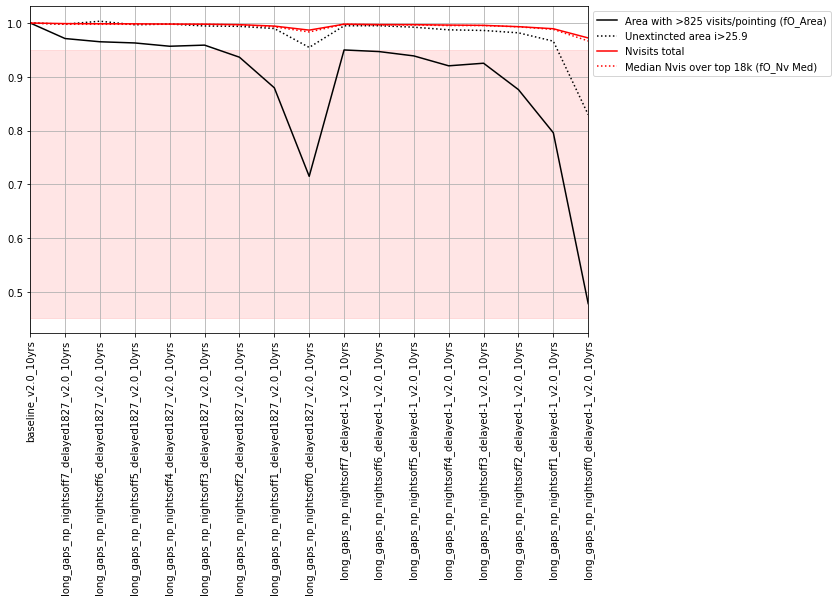

In [11]:
describe_family('long gaps no pairs')

<a id='rolling'></a>

### Rolling cadence ###

The updated baseline includes a 2-region rolling cadence throughout the low-dust WFD region. This improves the inter-night gaps between visits, and dramatically improves detection rates for transients that need characterization over the course of a few weeks (such as SNIa). However, whether or not to include a rolling cadence, where to include a rolling cadence (including other parts of the survey area outside the low-dust WFD), and when to start a rolling cadence are still open questions. This family adds various simulations of these options. 

The plain `rolling_ns*` runs add variable number of regions (ns2 = 1/2 of the area is active in the rolling cadence during rolling seasons, ns3 = 1/3 of the area, etc.), and at variable "weights" (50% or 90% .. indicating whether the active area receives a 50% boost or a 90% boost above 'non-rolling'). Other runs add rolling in the bulge, or all-sky. A few runs add a 6-band rolling cadence; this is likely to be somewhat fragile against weather upsets, as each active region only receives one season of active rolling, although it does also receive a very intense cadence of visits during that active season. The `early rolling` simulation changes the starting time for rolling from year 1.5 to the end of year 1; this results in some portions of the sky not receiving a full season of observations before rolling begins (or ends), but does align rolling with data release schedules. 

---
**rolling** : The rolling family covers a wide variety of rolling cadence variations. These are arranged in general estimation of the impact of the rolling cadence, from "least" to "most" - no_roll has no rolling cadence at all, then variations on the number of stripes (ns=2/3/6) are added, as as which areas of the sky (WFD only, adding the bulge WFD-area, all-sky). The strength of rolling is also varied (rw=50,80 or 90%).  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
noroll_v2.0_10yrs,v2.0 baseline with no rolling,12558.35,17005.77,2083375.0,837.0,54.0,70.0,177.0,180.0,160.0,166.0
rolling_ns2_rw0.5_v2.0_10yrs,Rolling half-sky (2 regions) 50%,12614.58,16807.69,2084510.0,838.0,54.0,69.0,177.0,180.0,160.0,166.0
rolling_ns3_rw0.5_v2.0_10yrs,Rolling third-sky (3 regions) 50%,12729.57,16873.16,2085499.0,838.0,54.0,70.0,177.0,180.0,160.0,166.0
rolling_ns2_rw0.9_v2.0_10yrs,Rolling half-sky (2 regions) 90%,12893.23,16711.18,2086980.0,839.0,54.0,70.0,178.0,180.0,160.0,166.0
rolling_ns3_rw0.9_v2.0_10yrs,Rolling third-sky (3 regions) 90%,13255.80,16568.50,2090909.0,841.0,54.0,70.0,178.0,181.0,160.0,167.0
rolling_bulge_ns2_rw0.5_v2.0_10yrs,"Roll in the bulge with 2 regions, 50%",12600.32,16868.96,2084413.0,838.0,54.0,69.0,177.0,180.0,160.0,166.0
rolling_bulge_ns2_rw0.8_v2.0_10yrs,"Roll in the bulge with 2 regions, 80%",12733.76,16664.18,2086550.0,838.0,54.0,70.0,178.0,180.0,161.0,166.0
rolling_bulge_ns2_rw0.9_v2.0_10yrs,"Roll in the bulge with 2 regions, 90%",12940.23,16706.14,2087907.0,840.0,54.0,70.0,178.0,180.0,160.0,166.0
rolling_all_sky_ns2_rw0.9_v2.0_10yrs,Roll on all parts of the sky,12900.78,16599.55,2088105.0,839.0,54.0,69.0,178.0,180.0,160.0,166.0


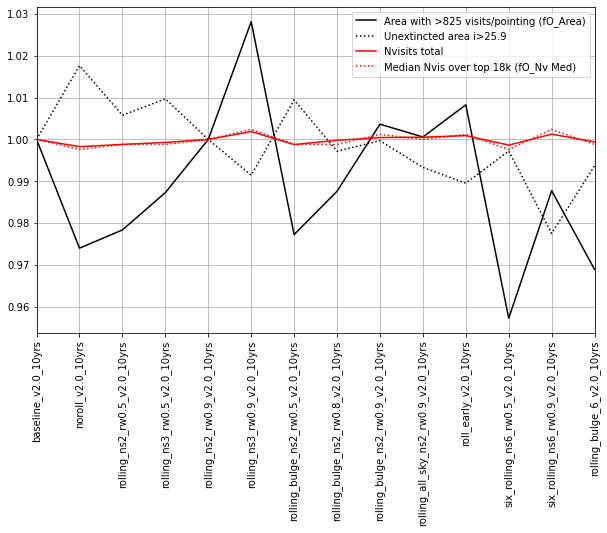

In [12]:
describe_family('rolling')

How rolling cadence is implemented makes little difference to the overall area covered or number of visits per pointing. It will affect the cadence, however.

<a id='mini-surveys'></a>

### Mini-surveys ###

The familiar mini-surveys include the Northern Ecliptic Spur, covering the ecliptic north of the WFD survey, and the Galactic Plane, which now covers the majority of the dusty regions of the galactic plane. The South Celestial Pole is an additional mini-survey, however it already has very minimal coverage and uses a very small amount of survey time, thus we have not studied modifying its survey time in the same way we have for the NES and the GP.

---
**vary nes** : These simulations investigate the effect of varying the amount of survey time spent on covering the North Ecliptic Spur area. The baseline characteristics, including the ratio of visits over the remainder of the footprint, are kept the same.   
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
vary_nes_nesfrac0.01_v2.0_10yrs,NES at 1% WFD level,17534.52,16896.66,2087392.0,869.0,55.0,72.0,184.0,187.0,167.0,172.0
vary_nes_nesfrac0.05_v2.0_10yrs,NES at 5% WFD level,17223.14,16868.96,2087572.0,865.0,55.0,71.0,183.0,186.0,166.0,172.0
vary_nes_nesfrac0.10_v2.0_10yrs,NES at 10% WFD level,16779.16,16769.09,2087761.0,861.0,55.0,71.0,182.0,185.0,165.0,171.0
vary_nes_nesfrac0.15_v2.0_10yrs,NES at 15% WFD level,16146.33,16760.69,2087741.0,856.0,55.0,71.0,181.0,184.0,164.0,170.0
vary_nes_nesfrac0.20_v2.0_10yrs,NES at 20% WFD level,15380.06,16815.25,2087462.0,851.0,55.0,71.0,180.0,183.0,163.0,169.0
vary_nes_nesfrac0.25_v2.0_10yrs,NES at 25% WFD level,14228.55,16691.03,2087377.0,845.0,54.0,70.0,179.0,181.0,161.0,168.0
vary_nes_nesfrac0.30_v2.0_10yrs,NES at 30% WFD level,12893.23,16711.18,2086980.0,839.0,54.0,70.0,178.0,180.0,160.0,166.0
vary_nes_nesfrac0.35_v2.0_10yrs,NES at 35% WFD level,11059.37,16583.60,2087488.0,832.0,53.0,69.0,176.0,178.0,159.0,165.0
vary_nes_nesfrac0.40_v2.0_10yrs,NES at 40% WFD level,9061.01,16561.78,2087857.0,825.0,53.0,69.0,174.0,177.0,157.0,164.0


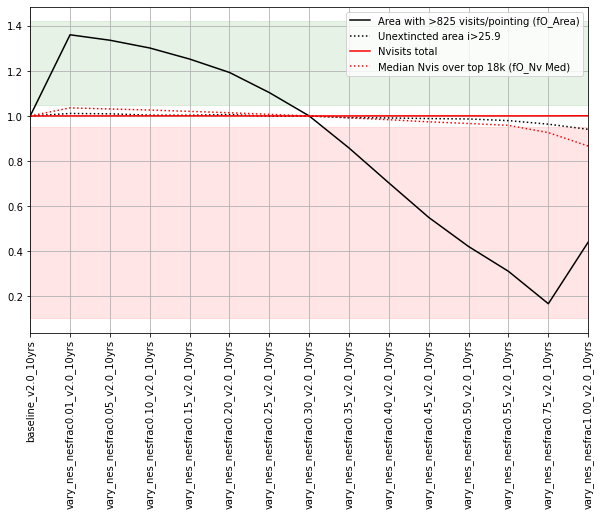

In [13]:
describe_family('vary nes')

---
**vary gp** : These simulations investigate the effect of varying the amount of survey time spent on covering the background (non-WFD-level) Galactic Plane area. The baseline characteristics, including the ratio of visits over the remainder of the footprint, are kept the same.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
vary_gp_gpfrac0.01_v2.0_10yrs,Dusty plane at 1% WFD level,16736.35,16818.61,2088147.0,861.0,55.0,71.0,182.0,185.0,165.0,171.0
vary_gp_gpfrac0.05_v2.0_10yrs,Dusty plane at 5% WFD level,16665.01,16706.14,2088534.0,861.0,55.0,71.0,182.0,185.0,164.0,171.0
vary_gp_gpfrac0.10_v2.0_10yrs,Dusty plane at 10% WFD level,16511.42,16810.21,2088477.0,859.0,55.0,71.0,182.0,185.0,164.0,170.0
vary_gp_gpfrac0.15_v2.0_10yrs,Dusty plane at 15% WFD level,15621.77,16739.71,2088838.0,853.0,54.0,71.0,181.0,183.0,163.0,169.0
vary_gp_gpfrac0.20_v2.0_10yrs,Dusty plane at 20% WFD level,14733.80,16736.35,2088077.0,847.0,54.0,70.0,179.0,182.0,162.0,168.0
vary_gp_gpfrac0.25_v2.0_10yrs,Dusty plane at 25% WFD level,13427.02,16636.48,2088389.0,841.0,54.0,70.0,178.0,181.0,161.0,167.0
vary_gp_gpfrac0.30_v2.0_10yrs,Dusty plane at 30% WFD level,11804.67,16665.01,2087314.0,834.0,54.0,69.0,176.0,179.0,160.0,166.0
vary_gp_gpfrac0.35_v2.0_10yrs,Dusty plane at 35% WFD level,9751.75,16700.26,2086873.0,827.0,53.0,69.0,174.0,177.0,158.0,165.0
vary_gp_gpfrac0.40_v2.0_10yrs,Dusty plane at 40% WFD level,7674.50,16560.94,2086160.0,820.0,53.0,70.0,173.0,176.0,156.0,163.0


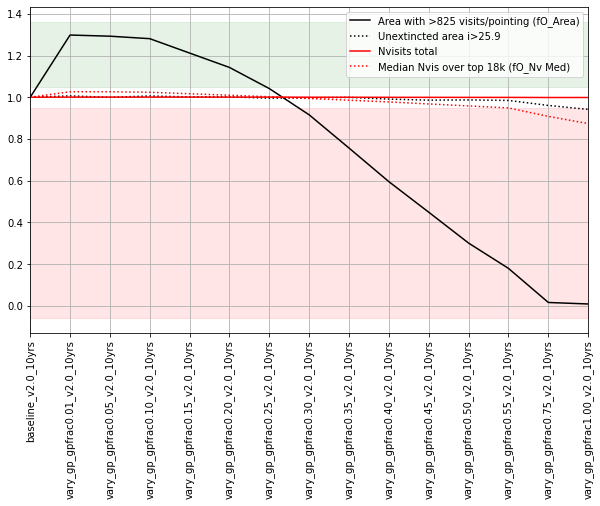

In [14]:
describe_family('vary gp')

---
**galactic plane footprint** : These simulations use the galactic plane priority map, contributed by LSST SMLV & TVS science collaborations, as the basis for further variations on galactic plane coverage. Instead of a "bulge area" as in the baseline and vary gp family, different levels of priority of the galactic plane map are covered at WFD levels. In addition, pencil beam fields are added or not, in various simulations.   
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
pencil_fs2_v2.1_10yrs,Add 4 larger galactic plane pencil beam fields,1117.94,16716.21,1948335.0,782.0,51.0,64.0,167.0,169.0,149.0,153.0
pencil_fs1_v2.1_10yrs,Add 20 small galactic plane pencil beam fields,890.49,16682.64,1948456.0,778.0,50.0,64.0,166.0,168.0,148.0,153.0
plane_priority_priority0.1_pbf_v2.1_10yrs,"Select galactic plane priority map above 0.1 threshold value, without pencilbeams",119.18,13434.57,2013032.0,646.0,37.0,89.0,140.0,140.0,127.0,51.0
plane_priority_priority0.2_pbf_v2.1_10yrs,"Select galactic plane priority map above 0.2 threshold value, without pencilbeams",367.61,15344.81,2018674.0,693.0,42.0,61.0,150.0,151.0,135.0,129.0
plane_priority_priority0.3_pbf_v2.1_10yrs,"Select galactic plane priority map above 0.3 threshold value, without pencilbeams",156.11,16008.69,2019186.0,727.0,45.0,61.0,157.0,159.0,141.0,139.0
plane_priority_priority0.4_pbf_v2.1_10yrs,"Select galactic plane priority map above 0.4 threshold value, without pencilbeams",604.29,16384.69,2019352.0,748.0,46.0,62.0,162.0,163.0,144.0,145.0
plane_priority_priority0.6_pbf_v2.1_10yrs,"Select galactic plane priority map above 0.6 threshold value, without pencilbeams",2586.70,16633.96,2018906.0,795.0,51.0,65.0,171.0,172.0,152.0,155.0
plane_priority_priority0.9_pbf_v2.1_10yrs,"Select galactic plane priority map above 0.9 threshold value, without pencilbeams",5655.16,16839.59,2019086.0,811.0,53.0,67.0,174.0,176.0,154.0,159.0
plane_priority_priority1.2_pbf_v2.1_10yrs,"Select galactic plane priority map above 1.2 threshold value, without pencilbeams",6545.65,16936.11,2019424.0,815.0,53.0,67.0,174.0,176.0,155.0,160.0


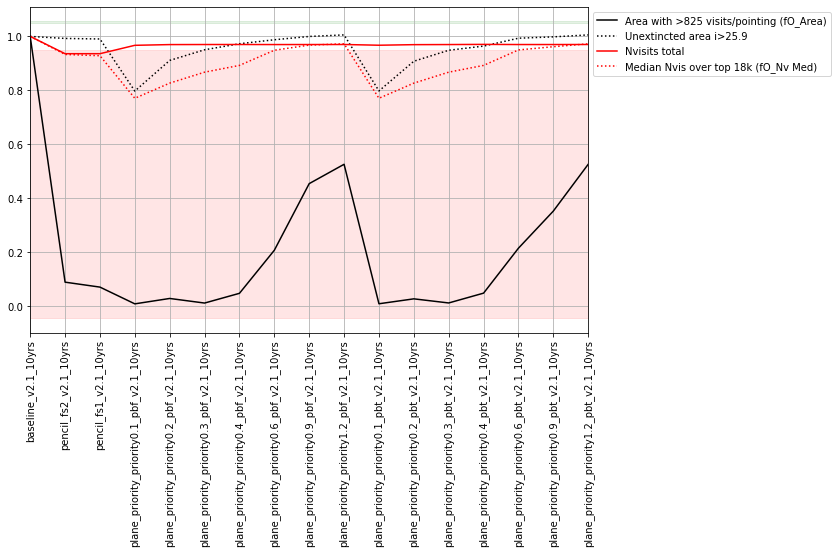

In [15]:
describe_family('galactic plane footprint')

<a id='filter'></a>

### Filter balance ###

The SCOC phase 1 recommendations found that the standard filter balance for the low-dust WFD region was generally considered appropriate, however, there were some questions as to whether more time spent in *u* and/or *g* bands would be helpful. The families here investigate different efforts at redirecting time towards these bluer bandpasses. 

---
**bluer balance** : The standard filter balance in the dust-free WFD in the baseline is {'u': 0.07, 'g': 0.09, 'r': 0.22, 'i': 0.22, 'z': 0.20, 'y': 0.20}. These simulations vary the filter balance, skewing it bluer. One simulation adds visits to g band,while the other adds visits to both u and g band, in each case by taking some visits from rizy.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
bluer_indx0_v2.0_10yrs,"More g - filter ratio in WFD of {'u': 0.07, 'g': 0.12, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.20}",12849.59,16155.56,2088051.0,839.0,53.0,94.0,170.0,171.0,152.0,166.0
bluer_indx1_v2.0_10yrs,"More u and g - filter ratio in WFD of {'u': 0.08, 'g': 0.11, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.20}",12876.44,16210.12,2089107.0,839.0,61.0,86.0,170.0,171.0,152.0,167.0


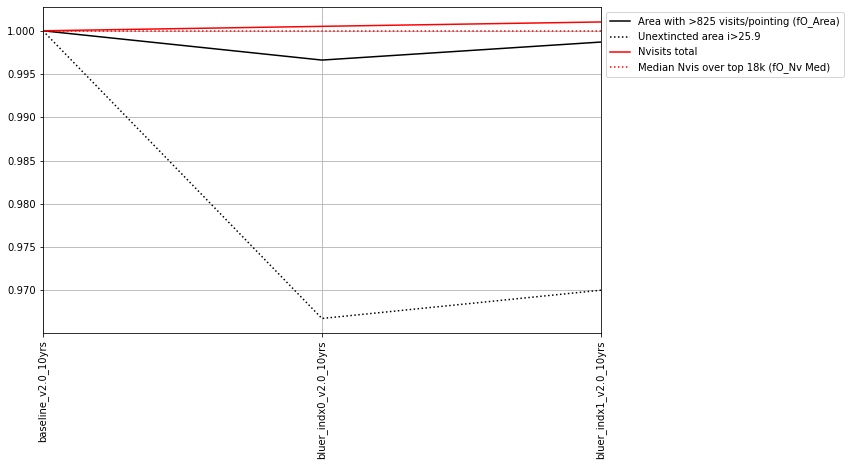

In [16]:
describe_family('bluer balance')

---
**longer u visits** : The baseline survey uses 2x15s visits for all bands except u band. In the baseline, u band visits are 1x30s to reduce the effects of readnoise (which are most extreme in u, due to the low sky-background). These simulations extend the u band visit time further, to 1x50s. In one simulation, the total amount of survey time spent on u band is kept the same, so the number of visits is reduced accordingly. In the other simulation, more survey time is spent in u band in order to maintain the number of visits in u.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
long_u1_v2.0_10yrs,"u band visits 1x50s, number of u visits same as baseline",17197.97,16420.78,2021286.0,866.0,52.0,67.0,171.0,174.0,155.0,161.0
long_u2_v2.0_10yrs,"u band visits 1x50s, fewer number of u visits",15840.83,16687.68,2040731.0,854.0,33.0,70.0,177.0,181.0,160.0,167.0


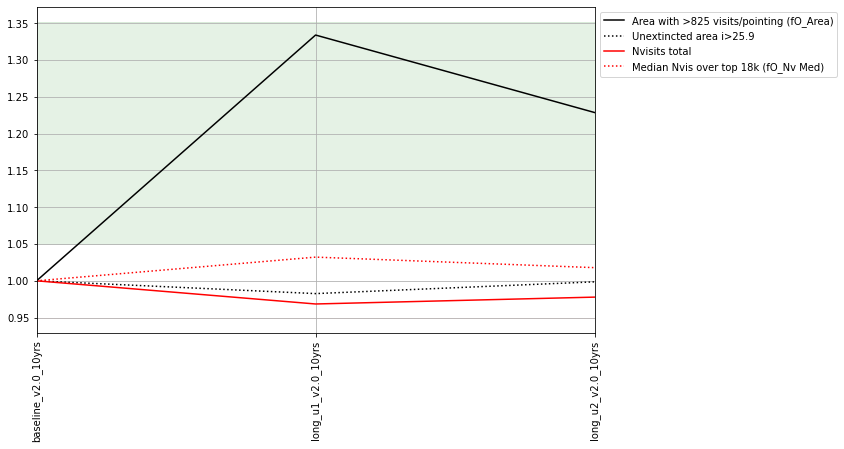

In [17]:
describe_family('longer u visits')

<a id="oddnends"></a>

### Other questions ###

There are a few other questions that don't fit neatly into bigger categories.

We could look into varying the exposure time per visit. This could be done in two ways: varying all of the exposure times consistently (the `shave` series of simulations, where the visit time varies from 20 seconds to 40 seconds) or varying the exposure time per visit so that the overall visit depth remains roughly consistent (`vary_expt_v2.0_10yrs`). The latter is hard to do in practice, as setting the goal depths requires knowing ahead of time what the most likely median depth will be; this is roughly possible, but getting the result incorrect can lead to offsets in the median visit exposure time that can have larger effects on goals like transient detection (tied to the overall number of visits). 

The newest baseline, `baseline_v2.1_10yrs` adds a requirement to acquire "good seeing" (fwhmEff<0.8 arcseconds) visits in each year in r and i bands. The `good_seeing` family adds requirements to get good seeing images in gri, and sometimes also u band, in all years as well. 

A run that was original created for other purposes may serve as a useful aid to collaborations wishing to check the effect of starting the survey in a different time of year; `march_start_v2.1_10yrs` starts the survey in March instead of October. 

Finally, we realized that about 20% of the time, a pointing will receive 3 or more visits per night, instead of just 2 visits per night (in `baseline_v2.1_10yrs`). This means we could move the additional visits (a 10% effect, as some of the visits need to stay in place for the 'pair') into different nights, by suppressing the factors that lead to repeating these visits. This can lead to longer slew times and potentially changes in the limiting magnitude per visit, but does increase the spread of nights that a field is observed over (potentially decreasing the inter-night gap or extending the observing season). The `suppress repeats` family looks at varying the weight on the suppression factor.

---
**vary expt** : The baseline survey strategy uses 2x15s visits for grizy filters, and 1x30s visits for u band. The simulations in this family vary the exposure time per visit from 20 to 40 seconds, to evaluate the impact on various metrics of varying individual image depth (the "shave_" runs). In addition, there is one simulation (`vary_expt_v2.0_10yrs`) which uses variable exposure time per visit to attempt to make the individual image depth consistent - each visit in this simulation could have an exposure time of between 20 to 100 seconds.  
**version**: --  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
shave_20_v2.1_10yrs,Reduce exposure time per visit to 20 seconds,19186.25,15422.02,2791414.0,1125.0,73.0,93.0,242.0,244.0,215.0,222.0
shave_22_v2.1_10yrs,Reduce exposure time per visit to 22 seconds,19074.63,15961.69,2611966.0,1053.0,68.0,87.0,226.0,228.0,200.0,208.0
shave_25_v2.1_10yrs,Reduce exposure time per visit to 25 seconds,18796.82,16501.35,2383592.0,961.0,62.0,79.0,206.0,208.0,183.0,189.0
shave_28_v2.1_10yrs,Reduce exposure time per visit to 29 seconds,18151.40,16810.21,2192248.0,884.0,57.0,72.0,189.0,191.0,168.0,174.0
shave_30_v2.1_10yrs,Keep exposure time per visit at 30 seconds,12524.78,17008.29,2081086.0,838.0,55.0,69.0,179.0,181.0,159.0,165.0
shave_32_v2.1_10yrs,Extend exposure time per visit to 32 seconds,2982.85,17111.52,1980338.0,797.0,51.0,65.0,170.0,172.0,151.0,157.0
shave_35_v2.1_10yrs,Extend exposure time per visit to 35 seconds,143.52,17180.34,1847269.0,744.0,48.0,61.0,158.0,161.0,141.0,147.0
shave_38_v2.1_10yrs,Extend exposure time per visit to 38 seconds,109.11,17224.82,1729706.0,696.0,45.0,57.0,148.0,150.0,131.0,138.0
shave_40_v2.1_10yrs,Extend exposure time per visit to 40 seconds,108.27,17265.95,1660675.0,667.0,43.0,55.0,142.0,144.0,126.0,131.0


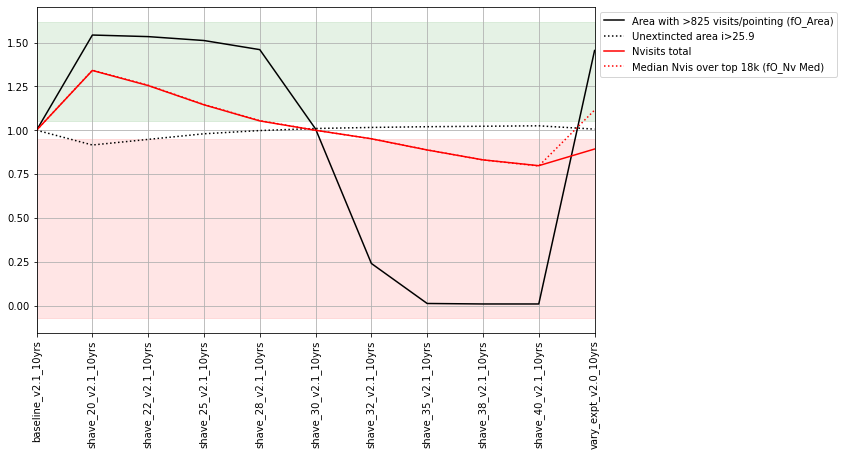

In [18]:
describe_family('vary expt')

---
**good seeing** : This family of simulations adds a requirement for 3 "good seeing" (seeing < 0.8 arcseconds) images per year, in various bandpasses. Note that `baseline_v2.1_10yrs` (and other v2.1 simulations) adds this requirement in r and i bands as the default.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
good_seeing_gsw0.0_v2.1_10yrs,"Good seeing priority, with weight 0.0, grizy only",12814.34,16662.50,2083703.0,840.0,54.0,69.0,179.0,181.0,160.0,166.0
good_seeing_gsw1.0_v2.1_10yrs,"Good seeing priority, with weight 1.0, grizy only",12507.15,16831.19,2082749.0,839.0,54.0,69.0,179.0,181.0,160.0,166.0
good_seeing_gsw10.0_v2.1_10yrs,"Good seeing priority, with weight 10.0, grizy only",12151.29,16915.96,2078628.0,837.0,54.0,69.0,179.0,182.0,158.0,165.0
good_seeing_gsw20.0_v2.1_10yrs,"Good seeing priority, with weight 20.0, grizy only",11874.33,16857.21,2077820.0,836.0,53.0,68.0,179.0,182.0,158.0,165.0
good_seeing_gsw3.0_v2.1_10yrs,"Good seeing priority, with weight 3.0, grizy only",12434.14,16842.94,2081749.0,838.0,54.0,68.0,179.0,181.0,159.0,165.0
good_seeing_gsw50.0_v2.1_10yrs,"Good seeing priority, with weight 50.0, grizy only",11885.24,16866.45,2077887.0,836.0,53.0,68.0,179.0,181.0,158.0,164.0
good_seeing_gsw6.0_v2.1_10yrs,"Good seeing priority, with weight 6.0, grizy only",12217.60,16857.21,2079596.0,837.0,54.0,69.0,179.0,182.0,158.0,165.0
good_seeing_u_gsw0.0_v2.1_10yrs,"Good seeing priority, with weight 0.0, including ugri band",13287.70,16677.60,2087748.0,841.0,55.0,68.0,179.0,182.0,160.0,167.0
good_seeing_u_gsw1.0_v2.1_10yrs,"Good seeing priority, with weight 1.0, including ugri band",13242.38,16773.28,2087233.0,840.0,55.0,68.5,179.0,182.0,160.0,167.0


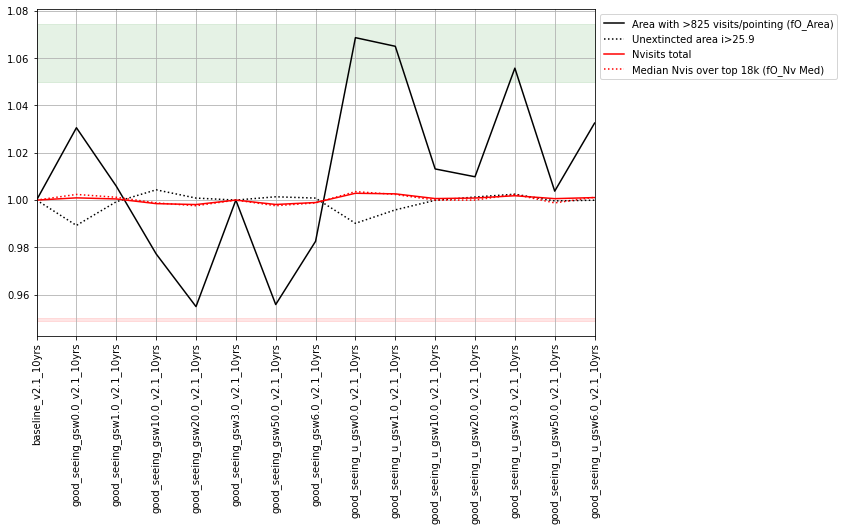

In [19]:
describe_family('good seeing')

---
**technical** : This family is primarily aimed at questions arising in the course of the project team work, but one simulation seemed interesting to make available to the community. This is the `march_start_v2.1_10yrs` run, which simulates a March 2023 start to the survey. This is impractical, but could serve as a useful off-season comparison to the baseline, which starts in October 2024.   
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
march_start_v2.1_10yrs,Start the survey in March 2022,11791.24,16935.27,2076012.0,835.0,54.0,68.0,178.0,181.0,159.0,165.0


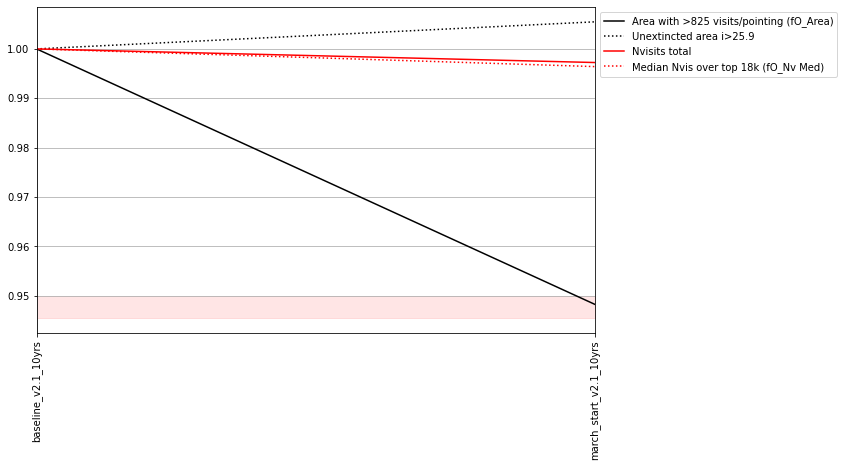

In [20]:
describe_family('technical')

---
**suppress repeats** : This family of simulations adds a basis function to suppress repetition of visits to pointings on the sky which have already been observed in the same night. In the baseline, there are on the order of 20% of pointings which are observed 3 or more times per night (instead of only 2), so this basis function redistributes the "extra" 10% of visits into different nights, changing the inter-night cadence or season length.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
no_repeat_rpw-1.0_v2.1_10yrs,Baseline but suppress repeats of pointings within the night by rpw 1.0,12360.28,16983.95,2078336.0,837.0,NaN,NaN,NaN,NaN,NaN,NaN
no_repeat_rpw-2.0_v2.1_10yrs,Baseline but suppress repeats of pointings within the night by rpw 2.0,12258.72,17003.25,2077671.0,837.0,NaN,NaN,NaN,NaN,NaN,NaN
no_repeat_rpw-5.0_v2.1_10yrs,Baseline but suppress repeats of pointings within the night by rpw 5.0,12158.01,16900.86,2076775.0,836.0,54.0,NaN,NaN,NaN,NaN,NaN
no_repeat_rpw-10.0_v2.1_10yrs,Baseline but suppress repeats of pointings within the night by rpw 10.0,12262.08,16908.41,2077379.0,836.0,NaN,68.0,NaN,181.0,NaN,NaN
no_repeat_rpw-20.0_v2.1_10yrs,Baseline but suppress repeats of pointings within the night by rpw 20.0,11854.18,16956.25,2076942.0,835.0,NaN,NaN,NaN,NaN,NaN,NaN
no_repeat_rpw-100.0_v2.1_10yrs,Baseline but suppress repeats of pointings within the night by rpw 100.0,12038.83,16902.53,2077286.0,836.0,NaN,69.0,NaN,NaN,NaN,NaN


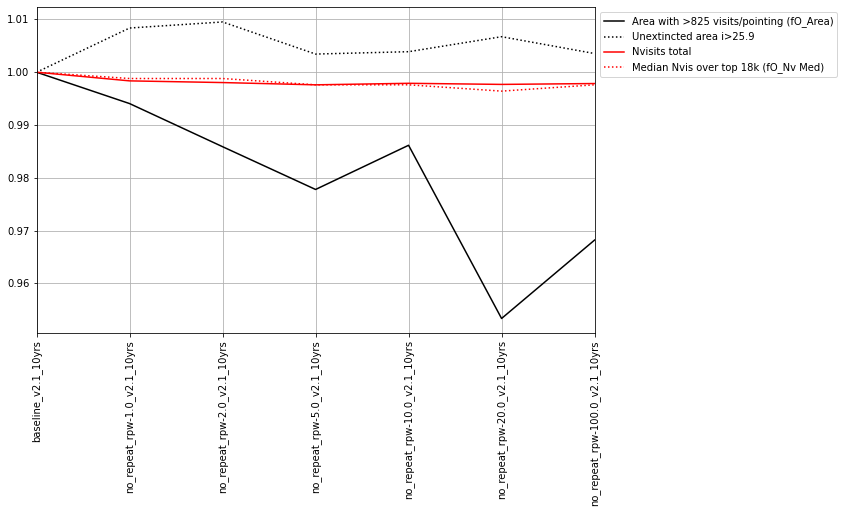

In [21]:
describe_family('suppress repeats')

<a id='micro-surveys'></a>

### Micro-surveys ###

There are many special observing proposals that can help support and extend the LSST's primary science drivers. Many of these were submitted in response to the 2018 Call for White Papers, and many of the micro-surveys requiring between 0.3-3% of the overall survey time were simulated as part of these v2.0 simulations. The SCOC are likely to delay decisions on micro-surveys beyond the Phase 2 recommendations, but these are useful guides to both preparing to answer community priorities and to ensure that the scheduler itself has all required capabilities.

Especially when considering micro-surveys, it is worthwhile to remember that sometimes visits can be extremely SHORT. 

---
**microsurveys** : There are special programs which can achieve additional science beyond or supporting the primary Rubin LSST science drivers, if provided specialized observing time via "microsurveys". These simulations investigate a subset of microsurvey proposals, described further in their brief descriptions.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
virgo_cluster_v2.0_10yrs,Add the virgo cluster to WFD footprint,12161.36,16686.00,2087802.0,836.0,54.0,70.0,177.0,179.0,160.0,165.0
carina_v2.0_10yrs,One week per year observing Carina,12519.74,16385.53,2087222.0,838.0,54.0,70.0,178.0,178.0,160.0,166.0
smc_movie_v2.0_10yrs,Two nights of observing the SMC in movie mode,12732.08,16743.07,2089048.0,838.0,54.0,69.0,177.0,180.0,160.0,167.0
roman_v2.0_10yrs,Microsurvey of the Roman bulge field,12283.06,16671.73,2083719.0,837.0,54.0,69.0,177.0,180.0,160.0,166.0
local_gal_bindx0_v2.0_10yrs,"Increase local galaxy coverage {'g': 0.5, 'r': 0.2, 'i': 0.1}",12330.90,16550.87,2087499.0,837.0,53.0,70.0,177.0,179.0,159.0,165.0
local_gal_bindx1_v2.0_10yrs,"Increasing local galaxy coverage {'g': 1.0, 'r': 0.3, 'i': 0.1}",11938.11,16554.23,2087949.0,836.0,52.0,72.0,177.0,178.0,159.0,164.0
local_gal_bindx2_v2.0_10yrs,"Increasing local galaxy coverage {'g': 1.5, 'r': 0.35, 'i': 0.2}",11226.39,16456.87,2087603.0,833.0,51.0,72.0,176.0,176.0,157.0,163.0
too_rate10_v2.0_10yrs,"Follow up ToO alerts, 10 events per year",12710.26,16508.91,2086250.0,838.0,54.0,70.0,177.0,180.0,160.0,166.0
too_rate50_v2.0_10yrs,"Follow up ToO alerts, 50 events per year",11628.41,16609.62,2079989.0,834.0,53.0,69.0,177.0,179.0,159.0,164.0


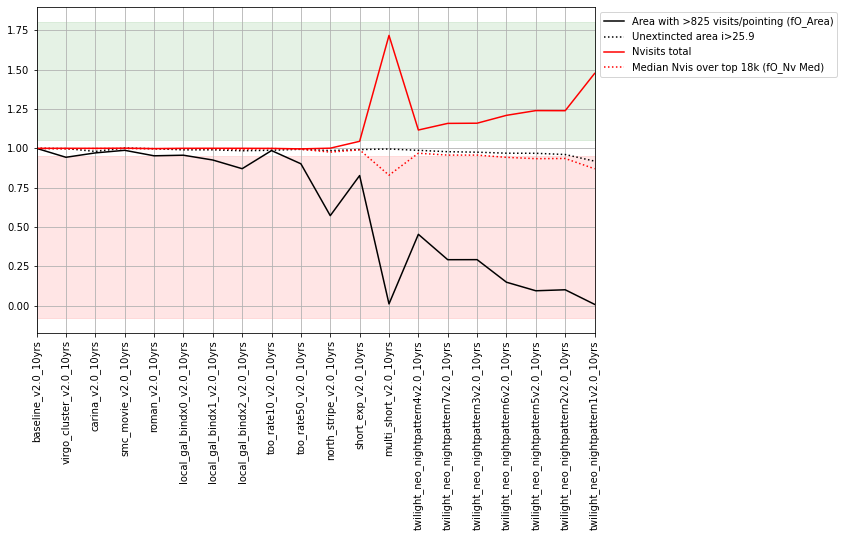

In [22]:
describe_family('microsurveys')

<a id='ddf'></a>

### DDF ###

The deep-drilling fields currently receive about 1% of the total survey time per DDF location. There are five DDFs, so this accounts for 5% of the total survey time. Each DDF is a single pointing, with the exception of the Euclid South DDF which is a double-pointing (so the final depths in this DDF are a little shallower). 

The families below investigate multiple changes that could be made in how the DDFs are executed. In general, there are always five DDF fields, in the same locations (the four "original" DDF fields announced in 2009 and the Euclid South DDF double pointing) -- however, there is one run that investigates the effect of moving the Euclid South DDF to a neutral different position (`ddf_euclid_moved_v2.1_10yrs`). 

A major upgrade with the v2.1 DDF runs is that the DDF fields are now pre-scheduled; that is, the nights for visits to each of the DDFs are roughly chosen ahead of time, to maximize their positioning with respect to the lunar cycle and their execution relative to each other (especially important as many of the DDFs are in a narrow band of RA). 

---
**ddf percent** : The baseline survey strategy adds five Deep Drilling Fields, each allocated about 1% of the total survey observing time, for about 5% total. In these simulations, the amount of time allocated for DDFs is varied from 3 to 8%. It is worth noting that we anticipate implementing improvements on the DDF scheduling algorithm in the next six months, and will revisit more complicated DDF scheduling requests with that improvement in hand.This family uses "original" DDF scheduling, not the v2.1 pre-scheduled optimized visits.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_frac_ddf_per0.6_v2.0_10yrs,DDF fraction of visits reduced to 3% of total,15656.18,16786.71,2087949.0,853.0,55.0,71.0,180.0,183.0,163.0,169.0
ddf_frac_ddf_per1.6_v2.0_10yrs,DDF fraction of visits increased to 8%,5702.16,16396.44,2086426.0,811.0,52.0,67.0,171.0,174.0,155.0,161.0


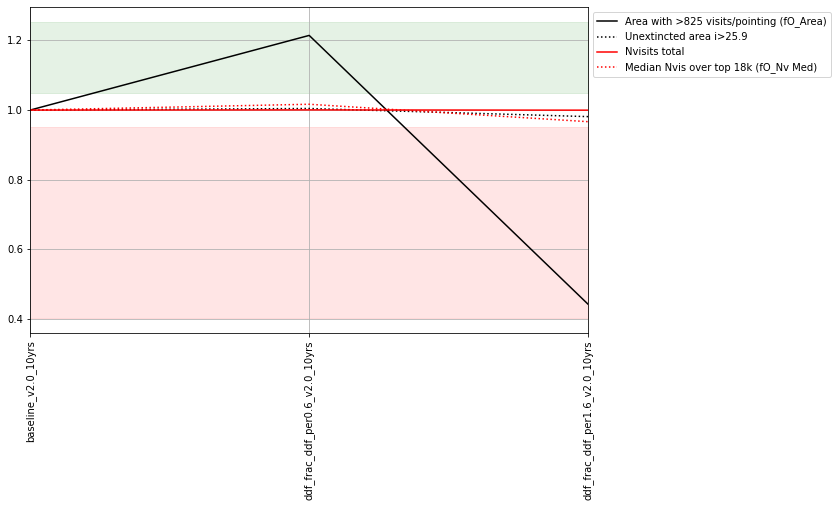

In [23]:
describe_family('ddf percent')

---
**ddf euclid moved** : This simulation moves the fifth DDF from Euclid South to an otherwise optimally (for non-competition between DDF locations purposes) located field. The purpose is to show that choosing Euclid South for the fifth DDF has little to no impact on the rest of the survey outside the DDF fields. This was demonstrated to the SCOC in slides located available at  https://docs.google.com/presentation/d/1TSKXsEX2Q3aY60dDVpc6Q9K2irxEyxQhVQBqLMetvag/edit#slide=id.p  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_euclid_moved_slf0.20_v2.1_10yrs,"Move Euclid South DDF to single new ""easy-scheduling"" position",11412.71,16802.66,2092831.0,834.0,54.0,68.0,178.0,181.0,157.0,165.0


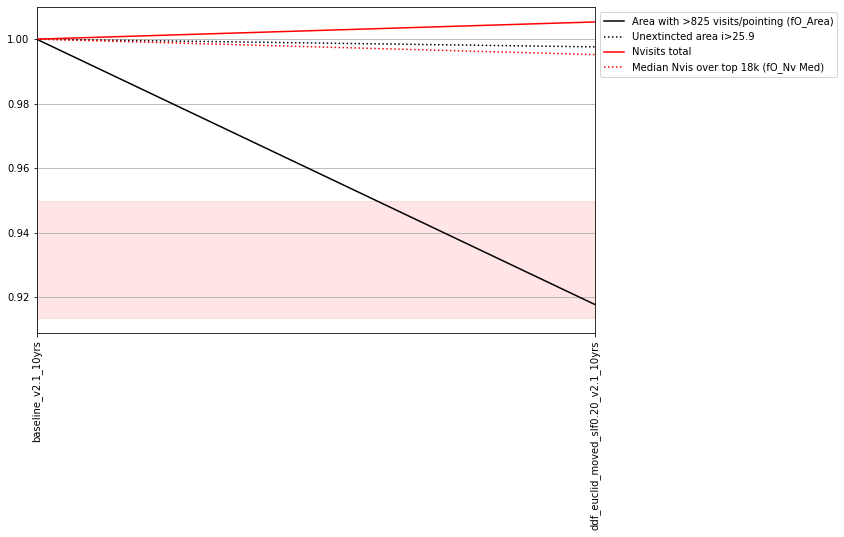

In [24]:
describe_family('ddf euclid moved')

---
**ddf season length** : This family investigates the effect of varying the season length within the DDF fields. `season length fraction` reflects how much of the available season is used -- 0.1 indicates that 10% of the available season is removed at each end (for a total of 80% of the available season used for observations), while 0.3 would indicate that 40% of the total possible season is used. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_season_length_slf0.10_v2.1_10yrs,DDF with season length fraction 0.10,11914.61,16855.53,2093356.0,836.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_season_length_slf0.15_v2.1_10yrs,DDF with season length fraction 0.15,11201.21,16874.00,2092507.0,833.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_season_length_slf0.20_v2.1_10yrs,DDF with season length fraction 0.20,11345.57,16880.71,2093596.0,833.0,54.0,68.0,179.0,180.0,158.0,164.0
ddf_season_length_slf0.25_v2.1_10yrs,DDF with season length fraction 0.25,10757.23,16800.14,2092586.0,831.0,54.0,68.0,177.0,180.0,158.0,164.0
ddf_season_length_slf0.30_v2.1_10yrs,DDF with season length fraction 0.30,10916.69,16844.62,2092932.0,832.0,53.0,68.0,178.0,180.0,157.0,164.0
ddf_season_length_slf0.35_v2.1_10yrs,DDF with season length fraction 0.35,10805.07,16759.85,2093751.0,831.0,54.0,68.0,177.0,181.0,157.0,164.0


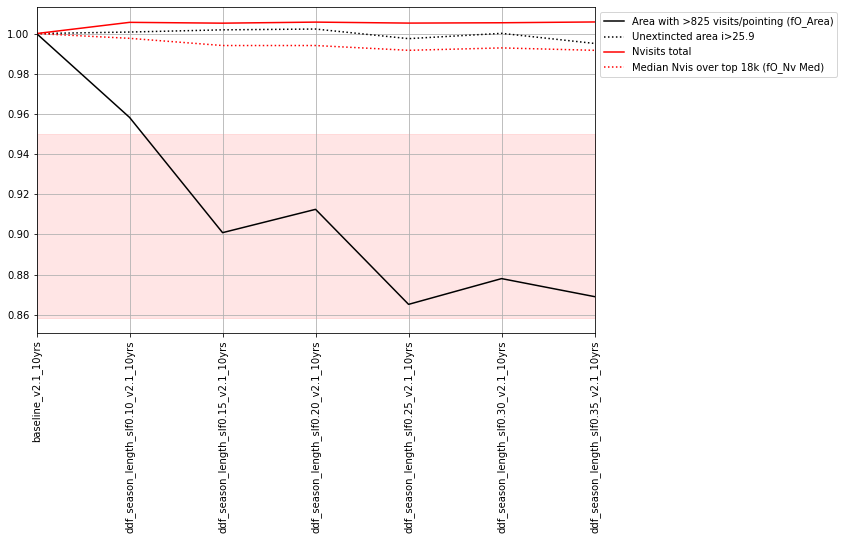

In [25]:
describe_family('ddf season length')

---
**ddf double** : This family cuts the individual DDF sequences in half, resulting in brighter single night coadded depths, but a shorter interval of nights between visits. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_double_slf0.10_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.10",10139.51,16846.30,2076416.0,829.0,54.0,68.0,177.0,180.0,157.0,163.0
ddf_double_slf0.15_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.15",9390.86,16822.80,2074408.0,826.0,53.0,67.0,176.0,179.0,157.0,163.0
ddf_double_slf0.20_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.20",8974.57,16812.73,2074875.0,824.0,53.0,67.0,176.0,179.0,156.0,163.0
ddf_double_slf0.25_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.25",8723.62,16753.98,2074021.0,823.0,53.0,67.0,176.0,178.0,156.0,162.0
ddf_double_slf0.30_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.30",8758.87,16782.52,2074785.0,824.0,53.0,67.0,176.0,178.0,156.0,162.0
ddf_double_slf0.35_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.35",8866.30,16774.96,2074848.0,824.0,53.0,67.0,176.0,178.0,156.0,162.0


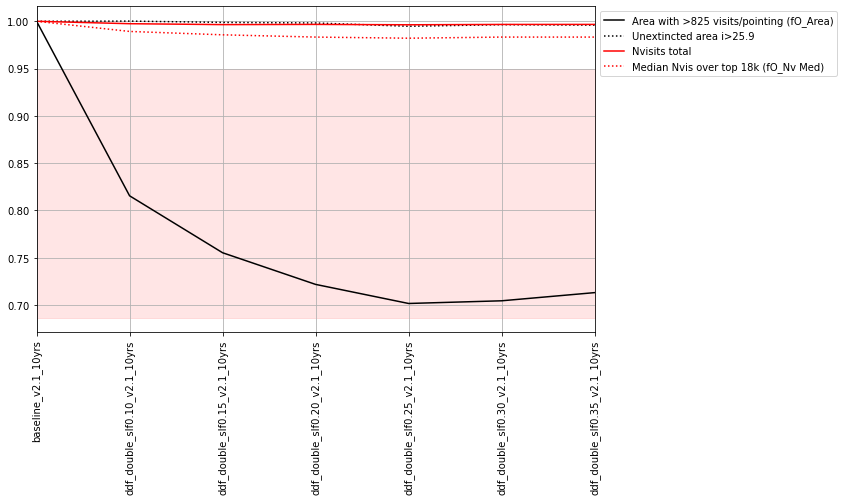

In [26]:
describe_family('ddf double')

---
**ddf quad** : This family cuts the individual DDF sequences by four, resulting in brighter single night coadded depths, but an even shorter interval of nights between visits.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_quad_slf0.10_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.10",5892.68,16675.93,2041518.0,813.0,52.0,67.0,173.0,176.0,154.0,160.0
ddf_quad_slf0.15_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.15",5250.62,16743.91,2036950.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.20_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.20",5281.67,16673.41,2038440.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.25_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.25",4783.13,16671.73,2035980.0,807.0,52.0,66.0,173.0,175.0,153.0,159.0
ddf_quad_slf0.30_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.30",4919.94,16553.39,2037701.0,808.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.35_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.35",5682.86,16612.14,2042853.0,811.0,52.0,66.0,174.0,176.0,154.0,160.0


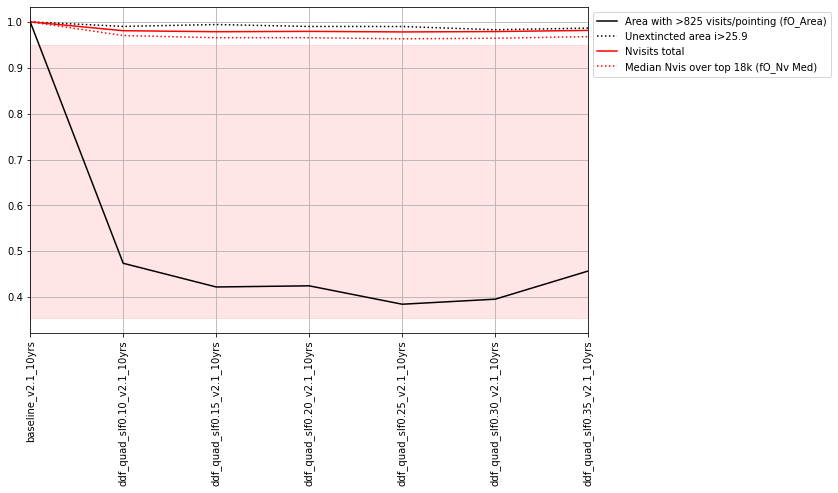

In [27]:
describe_family('ddf quad')

---
**ddf quad subfilter** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. However, here only some filters are used in each DDF sequence, alternating between active filters on different nights.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_quad_subfilter_slf0.10_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.10",14253.72,16889.11,2067093.0,846.0,54.0,69.0,182.0,183.0,161.0,167.0
ddf_quad_subfilter_slf0.15_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.15",13943.19,16884.91,2064387.0,845.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.20_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.20",14117.76,16854.69,2065407.0,845.0,54.0,69.0,181.0,183.0,160.0,166.0
ddf_quad_subfilter_slf0.25_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.25",13831.56,16835.39,2064822.0,844.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.30_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.30",14104.33,16811.89,2066396.0,845.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.35_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.35",14408.99,16819.44,2068666.0,847.0,54.0,69.0,182.0,184.0,160.0,167.0


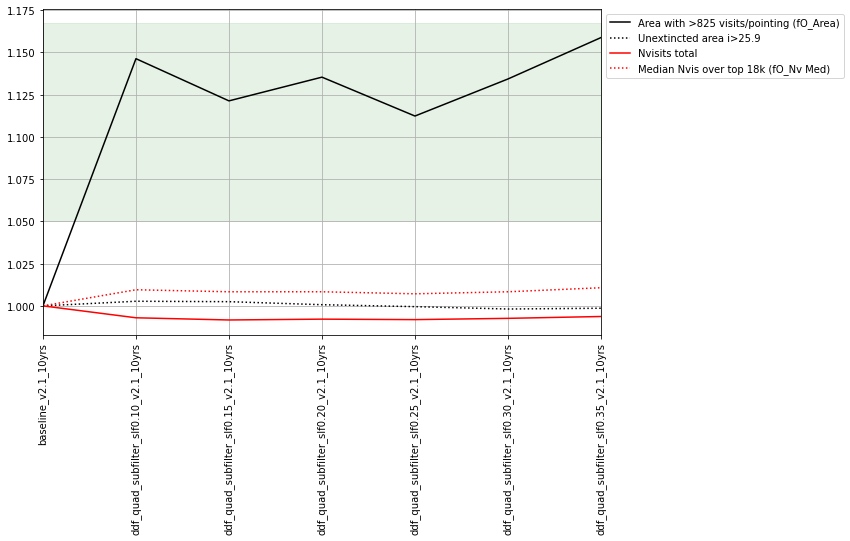

In [28]:
describe_family('ddf quad subfilter')

---
**ddf bright** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. In this family, the m5 limits for scheduling visits are relaxed, resulting in visits running more consistently throughout the lunar cycle even into bright time. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_bright_slf0.10_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.10",6401.29,16804.34,2044360.0,814.0,53.0,67.0,174.0,177.0,154.0,160.0
ddf_bright_slf0.15_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.15",5102.91,16773.28,2035970.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_bright_slf0.20_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.20",5191.03,16700.26,2039002.0,809.0,52.0,66.0,173.0,176.0,153.0,159.0
ddf_bright_slf0.25_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.25",4598.49,16672.57,2034445.0,806.0,52.0,66.0,172.0,175.0,152.0,159.0
ddf_bright_slf0.30_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.30",4640.45,16618.85,2036705.0,807.0,52.0,66.0,172.0,175.0,153.0,159.0
ddf_bright_slf0.35_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.35",5901.07,16648.23,2043294.0,812.0,52.0,66.0,174.0,176.0,154.0,160.0


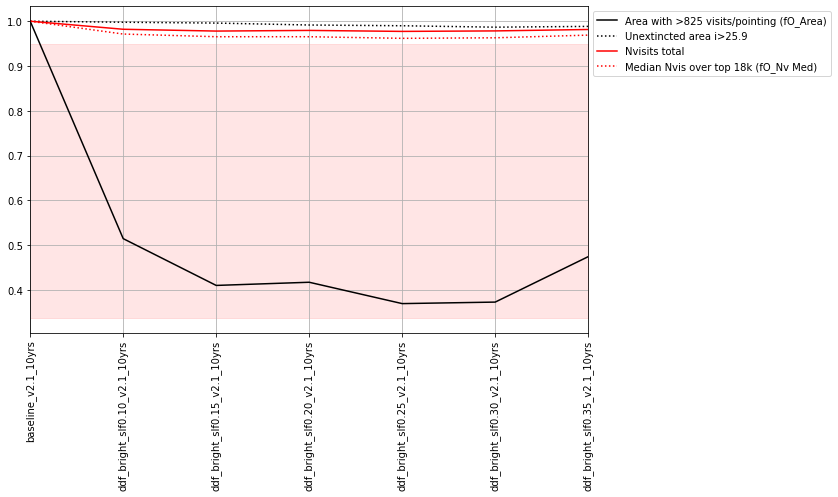

In [29]:
describe_family('ddf bright')

---
**ddf dither** : This family varies the dithering pattern for the DDF sequences, changing the max translational dither from 0.01 to 3.5 degrees. Increasing dither sizes are expected to improve calibration, while decreasing dither sizes may improve final coadded depth over the smaller total observed area.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_dither_size_slf0.20_md0.01_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.01 deg,11361.52,16827.00,2093931.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0
ddf_dither_size_slf0.20_md0.05_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.05 deg,11458.04,16874.84,2093546.0,834.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_dither_size_slf0.20_md0.10_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.10 deg,11406.00,16911.77,2093111.0,834.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_dither_size_slf0.20_md0.25_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.25 deg,11275.91,16771.60,2093397.0,833.0,54.0,68.0,178.0,181.0,157.0,164.0
ddf_dither_size_slf0.20_md0.50_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.50 deg,11531.06,16855.53,2093476.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0
ddf_dither_size_slf0.20_md0.70_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.70 deg,11345.57,16880.71,2093596.0,833.0,54.0,68.0,179.0,180.0,158.0,164.0
ddf_dither_size_slf0.20_md1.00_v2.1_10yrs,DDFs with variable dither offsets - max dither 1.00 deg,11515.95,16880.71,2093546.0,834.0,54.0,68.0,178.0,180.0,158.0,164.0
ddf_dither_size_slf0.20_md1.50_v2.1_10yrs,DDFs with variable dither offsets - max dither 1.50 deg,11520.98,16872.32,2093778.0,835.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_dither_size_slf0.20_md2.50_v2.1_10yrs,DDFs with variable dither offsets - max dither 2.50 deg,11575.54,16820.28,2093050.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0


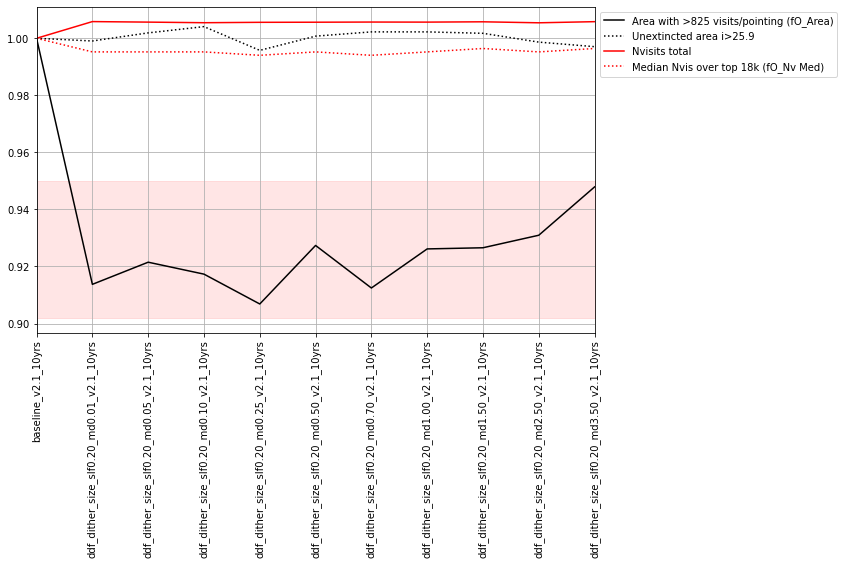

In [30]:
describe_family('ddf dither')

---
**ddf roll** : This family adds a rolling cadence to the DDFs, so that DD fields are observed more intensely in some years, less intensely in others.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_roll_slf0.20_v2.1_10yrs,Roll the DDF fields between years,11373.27,16830.36,2097302.0,833.0,53.0,68.0,178.0,181.0,158.0,165.0


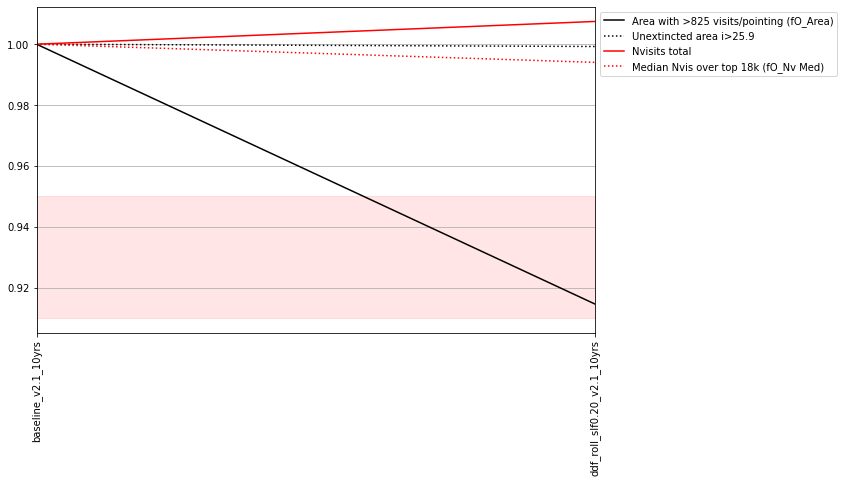

In [31]:
describe_family('ddf roll')

---
**ddf accordian** : This family adds an "accordian" low/high rate over each season approach to DDF cadence. The edges of each season are observed at a "low" rate while the center of the season is observed at a faster "high" rate. Each simulation is identified by a total season length fraction (as in `ddf season`) with a similar low season fraction (`lsf`) within that and a low season rate (lsr). Thus `ddf_accourd_sf0.30_lsf0.4_lsr0.1_v2.1_10yrs` would have a fairly short overall season (40% of the available season), a long low season (80% - so 20% high season), and a small low season rate (0.1), leaving most DDF visits concentrated in the center of the season. Conversely, `ddf_accourd_sf0.10_lsf0.1_lsr0.5_v2.1_10yrs` would have a long overall season, a short low season, and a high rate during the low season, resulting in a very mild accordian effect. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_accourd_sf0.05_lsf0.1_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.1 low season rate",11620.86,16894.14,2092819.0,835.0,54.0,69.0,178.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.1_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.3 low season rate",12057.29,16928.55,2093029.0,836.0,54.0,69.0,179.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.1_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.5 low season rate",11988.47,16905.89,2093089.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.2_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.1 low season rate",11492.45,16875.68,2092685.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.2_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.3 low season rate",11685.49,16918.48,2092789.0,835.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.2_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.5 low season rate",11917.13,16948.70,2092217.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.3_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.1 low season rate",11043.43,16873.16,2092723.0,832.0,54.0,68.0,178.0,180.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.3_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.3 low season rate",11677.09,16854.69,2093005.0,835.0,54.0,68.0,179.0,180.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.3_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.5 low season rate",11989.31,16895.82,2092042.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0


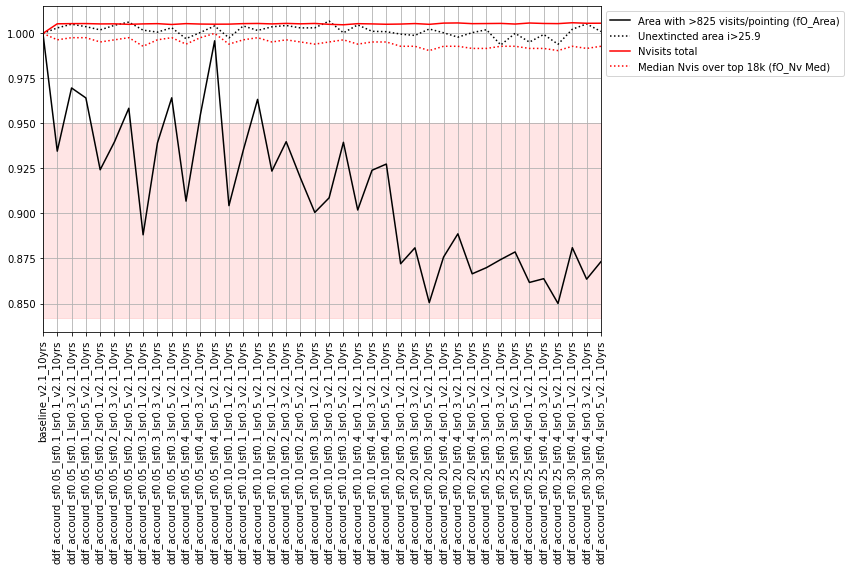

In [32]:
describe_family('ddf accordian')

---
**ddf old rot** : This family adds a validation or comparison option for the remainder of the v2.1 DDF simulations. In this family, the rotation angle is fixed so that rotTelPos is constant; in most v2.1 simulations, rotSkyPos is held fixed. Otherwise this family is similar to `ddf season length`, and uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_old_rot_slf0.10_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.10",12555.83,16830.36,2098086.0,838.0,54.0,69.0,179.0,181.0,159.0,166.0
ddf_old_rot_slf0.15_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.15",11909.58,16870.64,2096946.0,835.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_old_rot_slf0.20_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.20",12067.36,16855.53,2097655.0,836.0,54.0,69.0,178.0,181.0,158.0,165.0
ddf_old_rot_slf0.25_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.25",11191.14,16790.91,2096966.0,833.0,54.0,68.0,178.0,180.0,157.0,164.0
ddf_old_rot_slf0.30_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.30",11410.20,16811.05,2098048.0,833.0,54.0,68.0,178.0,180.0,158.0,165.0
ddf_old_rot_slf0.35_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.35",11520.14,16835.39,2097766.0,833.0,54.0,68.0,178.0,180.0,158.0,164.0


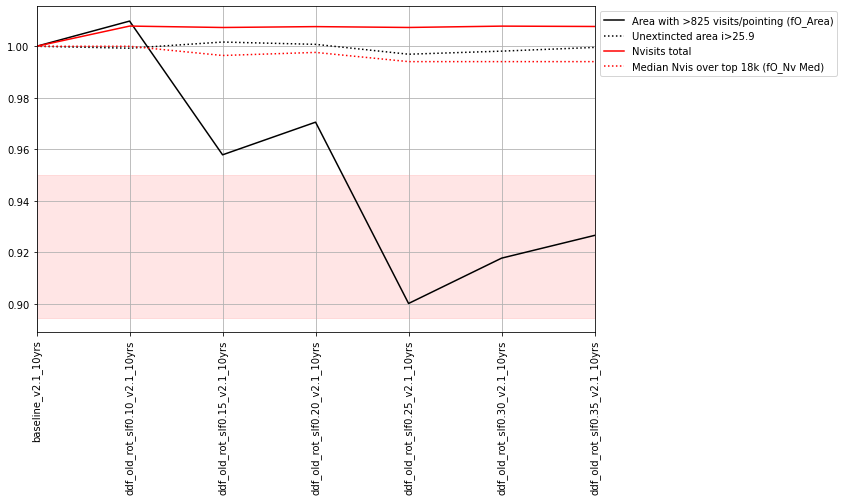

In [33]:
describe_family('ddf old rot')

---
**ddf deep universal** : This family uses longer and more frequent nightly sequences for the DDFs. These sequences are described in a DESC DDF paper, and are roughly 41 visits per night every night during the season. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_deep_u_slf0.20_v2.1_10yrs,DESC deep universal DDF sequences,1735.66,16467.78,2046659.0,787.0,51.0,64.0,168.0,171.0,149.0,155.0


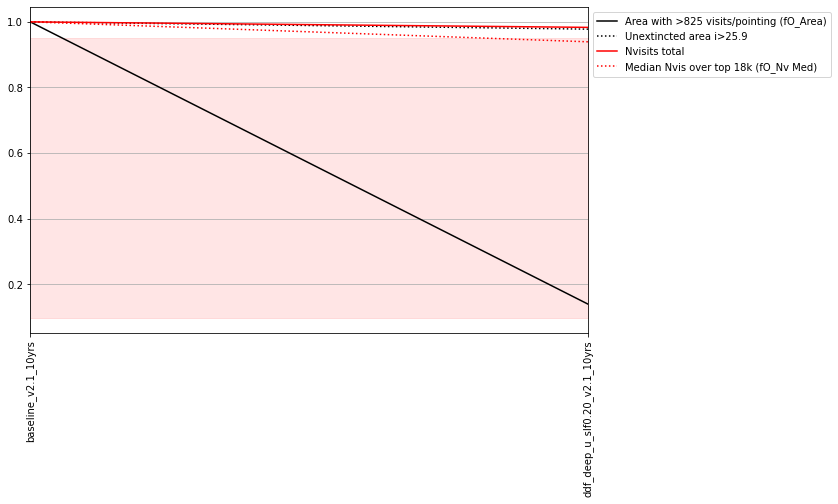

In [34]:
describe_family('ddf deep universal')

---
**ddf deep rolling** : This family is based on the `ddf deep universal` but adds a rolling cadence to the DDF fields. The rolling cadence simply observes each field for two seasons, and then stops, thus reducing the overall time requirement for the DDFs from the budget requested in `ddf deep universal`. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_deep_rolling_slf0.20_v2.1_10yrs,"DESC deep universal sequences, with rolling - each DDF observed for 2 seasons",16001.13,17062.0,2085627.0,856.0,56.0,70.0,183.0,185.0,162.0,169.0


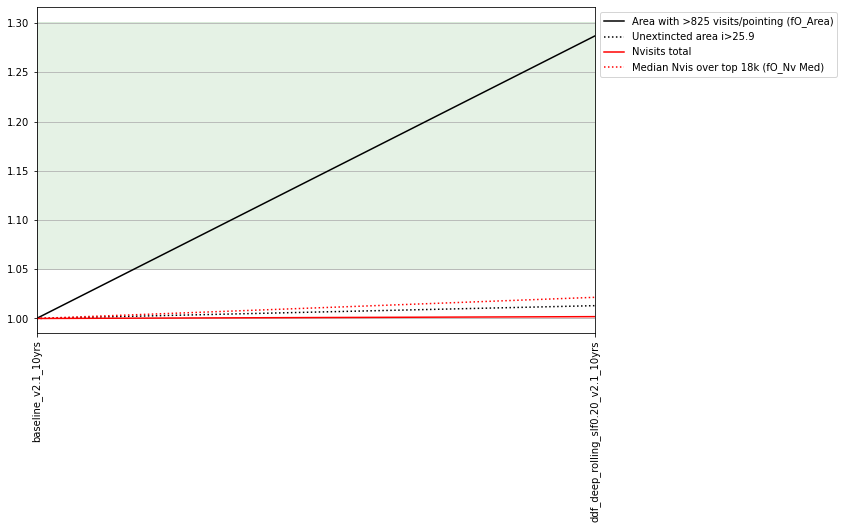

In [35]:
describe_family('ddf deep rolling')

---
**ddf early deep** : This family reduces the overall number of DDFs to 3; XMM-LSS, COSMOS, and the double pointing EDFS. A deep nightly sequence and fast cadence is requested on these few fields.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_early_deep_slf0.20_f10.60_f20.70_v2.1_10yrs,DESC early deep rolling DDF cadences - z complete .70,17380.09,17103.13,2087518.0,868.0,56.0,71.0,186.0,188.0,165.0,171.0
ddf_early_deep_slf0.20_f10.60_f20.75_v2.1_10yrs,DESC early deep rolling DDF cadences - z complete .75,17109.84,17066.20,2090513.0,866.0,56.0,71.0,185.0,188.0,164.0,171.0
ddf_early_deep_slf0.20_f10.60_f20.80_v2.1_10yrs,DESC early deep rolling DDF cadences - z complete .80,16764.89,17107.32,2090831.0,862.0,56.0,71.0,184.0,187.0,164.0,170.0


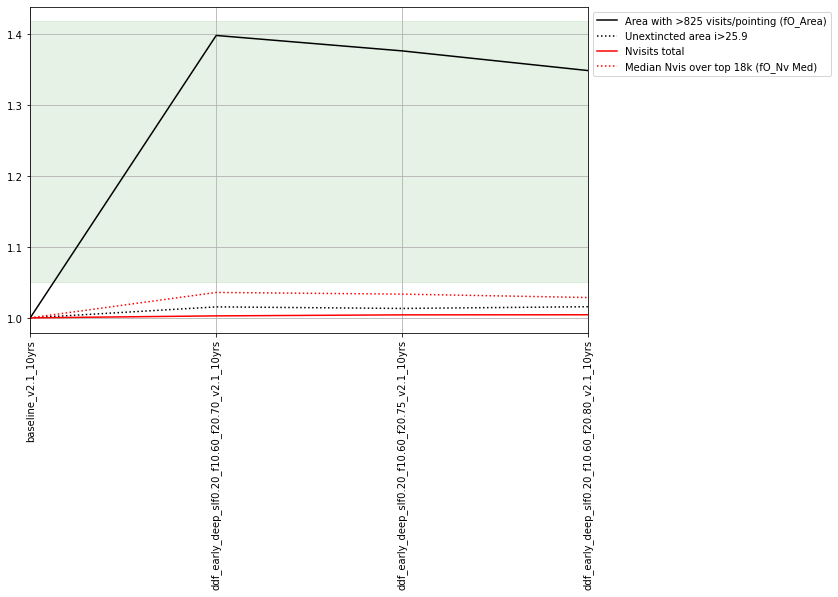

In [36]:
describe_family('ddf early deep')

In [39]:
len(families.index) # matches with cell 9 - 37 being used above 

28

In [41]:
len(families.explode('run')) # 265 runs in v2.0 + v2.1

265